In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.pipeline import Pipeline

churn_data = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")
churn_data


,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.90,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.20,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.30,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.30,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.10,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,837,High,F,S,0,64319.20,N,41,3010.30,37,752.5750,75.25750,5.55,1,18,0.0000,150.51500
2062,838,Medium,F,S,1,73338.00,N,48,20922.09,9,10461.0450,1046.10450,2.25,1,9,0.0000,1046.10450
2063,839,Medium,F,S,0,433.74,N,61,3300.33,40,825.0825,82.50825,6.00,5,11,0.0000,82.50825
2064,840,Low,F,M,2,16962.20,N,45,18601.86,8,9300.9300,930.09300,2.00,1,5,930.0930,0.00000


In [4]:
churn_data.dtypes

ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object

In [5]:
churn_data.count()

ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64

# Cleaning the code

In [6]:
cleaned_churn_data = churn_data[~churn_data["GENDER"].isna()]
cleaned_churn_data = cleaned_churn_data.drop(["ID"], axis=1)

# Data preprocessing

In [7]:
categorical_cols = ["GENDER", "STATUS", "HOMEOWNER"]

cleaned_churn_data.loc[:,categorical_cols].head(5)

onehot_encode =  preprocessing.OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('onehot',onehot_encode)])

In [8]:
preprocessorForCategorical = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols)],
                                            remainder="passthrough")

In [9]:
test = preprocessorForCategorical.fit_transform(cleaned_churn_data)

In [10]:
encoder =  preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(cleaned_churn_data.loc[:,categorical_cols])
encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['D', 'M', 'S'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [11]:
test[0] #transformed entries put leftmost, and then untransformed after

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 'High', 1, 64792.3, 52,
       13051.31, 36, 6525.655, 652.5655, 9.0, 3, 6, 0.0, 652.5655],
      dtype=object)

In [12]:
cleaned_churn_data

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
3,High,M,M,1,64792.30,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.000,652.56550
4,High,F,S,0,93322.10,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.000,1496.14950
5,High,M,M,2,49910.70,Y,52,27422.74,23,13711.3700,1371.13700,5.75,3,10,0.000,1371.13700
6,High,M,M,0,76161.40,Y,45,11961.20,25,5980.6000,598.06000,6.25,2,5,0.000,598.06000
7,High,F,M,2,55860.00,Y,15,16011.60,10,8005.8000,800.58000,2.50,2,8,0.000,800.58000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,High,F,S,0,64319.20,N,41,3010.30,37,752.5750,75.25750,5.55,1,18,0.000,150.51500
2062,Medium,F,S,1,73338.00,N,48,20922.09,9,10461.0450,1046.10450,2.25,1,9,0.000,1046.10450
2063,Medium,F,S,0,433.74,N,61,3300.33,40,825.0825,82.50825,6.00,5,11,0.000,82.50825
2064,Low,F,M,2,16962.20,N,45,18601.86,8,9300.9300,930.09300,2.00,1,5,930.093,0.00000


# Getting all numerical columns

In [13]:
numerical_cols = cleaned_churn_data.select_dtypes(include =[float, int]).columns
numerical_cols

Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')

In [14]:
standard_scaler = preprocessing.StandardScaler()
numerical_transformer = Pipeline(steps=[('scale',standard_scaler)])
preprocessingForNum = ColumnTransformer(transformers=[('scale', numerical_transformer, numerical_cols)],
                                            remainder="passthrough")

# Combining both preprocessors

In [15]:
preprocessorForAll= ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols),
                                                    ('num',numerical_transformer,numerical_cols)],
                                                    remainder="passthrough")

In [16]:
target_name = "CHURNRISK"
features = cleaned_churn_data.drop([target_name], axis = 1)
target_churn = cleaned_churn_data.loc[:,target_name]

In [17]:
label_encoder = preprocessing.LabelEncoder()
target = label_encoder.fit_transform(target_churn)

# Split data into training and testing data sets

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, train_size = 0.8, random_state = 0)

# Classifier

In [19]:
lr = linear_model.LogisticRegression(max_iter = 1000,random_state=0,multi_class='auto',solver='lbfgs')

lr_model = Pipeline(steps = [("preprocessorAll",preprocessorForAll), ('classifier', lr)])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'STATUS',
                                                   'HOMEOWNER']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=0))])

In [20]:
y_test_lr = lr_model.predict(X_test)
label_encoder.classes_
y_test = label_encoder.inverse_transform(y_test)
y_test_lr = label_encoder.inverse_transform(y_test_lr)

In [21]:
conf_matrix = pd.DataFrame([y_test, y_test_lr])
conf_matrix = conf_matrix.T
conf_matrix.columns = ["Actual Test", "Predicted (RFC)"]

In [22]:
conf_matrix_LR = pd.crosstab(conf_matrix["Predicted (RFC)"], conf_matrix["Actual Test"])

<Axes: xlabel='Actual Test', ylabel='Predicted (RFC)'>

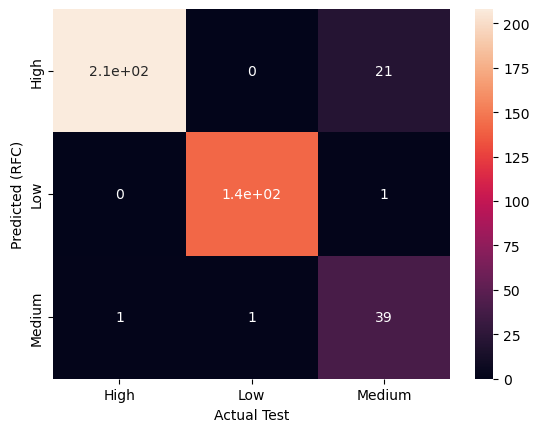

In [23]:
sns.heatmap(conf_matrix_LR, annot = True)